In [38]:
import pandas as pd
 

bench_results = pd.read_csv('results.csv')
bench_results.sort_values(by=['Codec', 'File'], inplace=True)
bench_results

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio
42,all-event-times-dup.bin,BSC,10.599088,12.754834,1.830122
43,all-referer-regions-dup.bin,BSC,58.861181,115.019553,42.240314
40,all-titles.bin,BSC,26.805573,49.744572,9.824522
41,all-watch-ids-dup.bin,BSC,7.506562,2709.118233,0.999949
20,all-event-times-dup.bin,DEFLATE_QPL,273.649173,307.855320,1.388645
30,all-referer-regions-dup.bin,DEFLATE_QPL,409.887862,1186.517495,19.772143
0,all-titles.bin,DEFLATE_QPL,336.152716,646.196484,4.295883
10,all-watch-ids-dup.bin,DEFLATE_QPL,318.719792,1505.065685,0.999936
24,all-event-times-dup.bin,LZ4HC(12),28.820498,1425.856219,1.128725
34,all-referer-regions-dup.bin,LZ4HC(12),2.716779,2817.979050,23.561905


In [39]:
import re

def codec_base(codec):
    parts = codec.split('(')
    if len(parts) == 1:
        return codec
    return parts[0]

bench_results['Algo'] = bench_results['Codec'].apply(lambda x: codec_base(x))
bench_results.head()

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
42,all-event-times-dup.bin,BSC,10.599088,12.754834,1.830122,BSC
43,all-referer-regions-dup.bin,BSC,58.861181,115.019553,42.240314,BSC
40,all-titles.bin,BSC,26.805573,49.744572,9.824522,BSC
41,all-watch-ids-dup.bin,BSC,7.506562,2709.118233,0.999949,BSC
20,all-event-times-dup.bin,DEFLATE_QPL,273.649173,307.855320,1.388645,DEFLATE_QPL


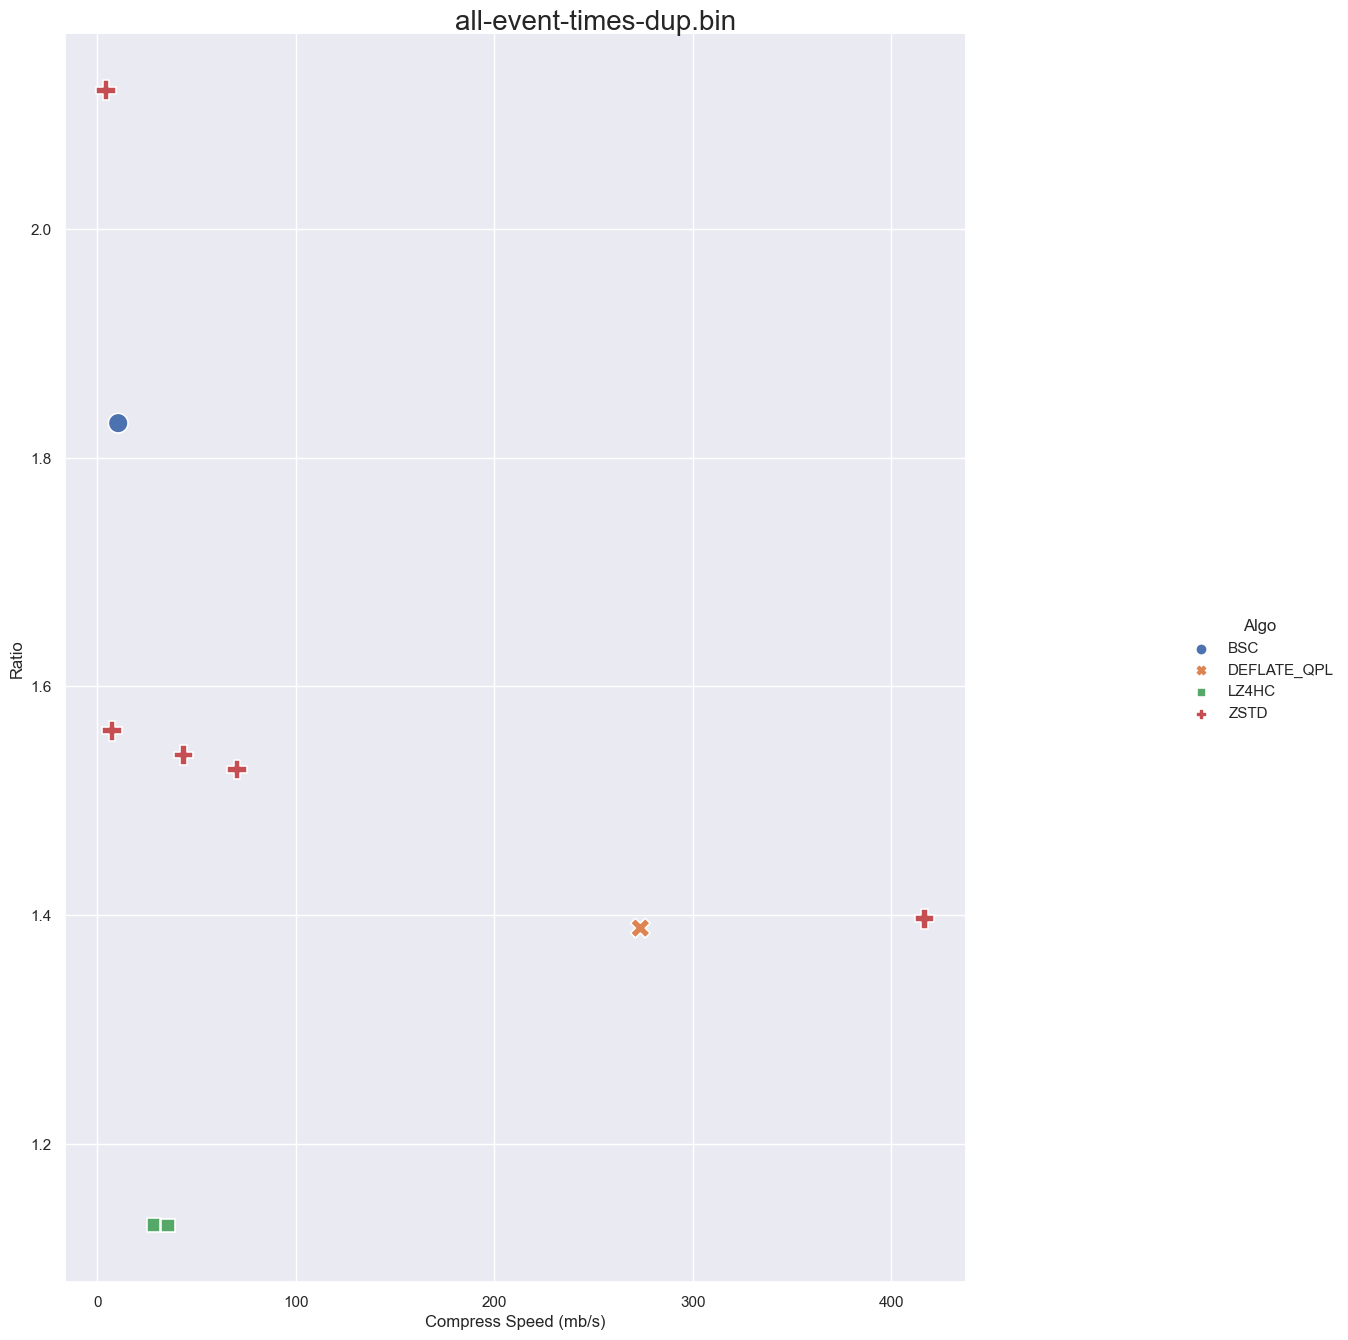

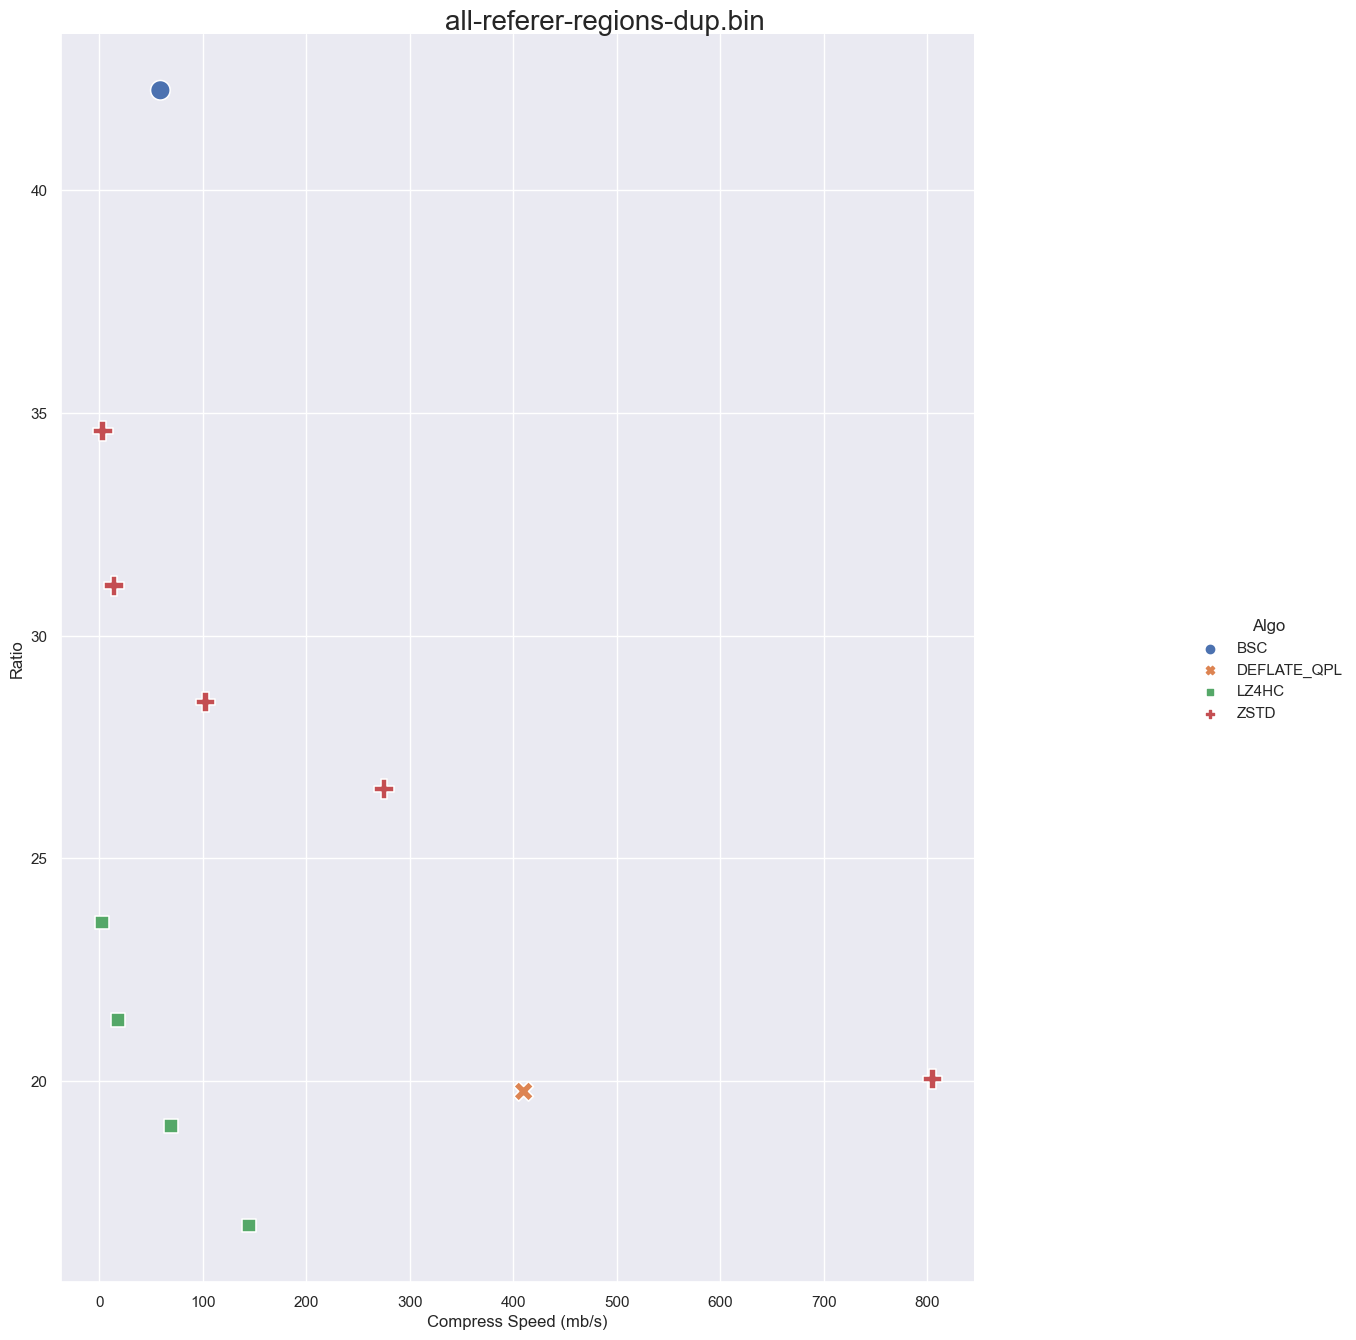

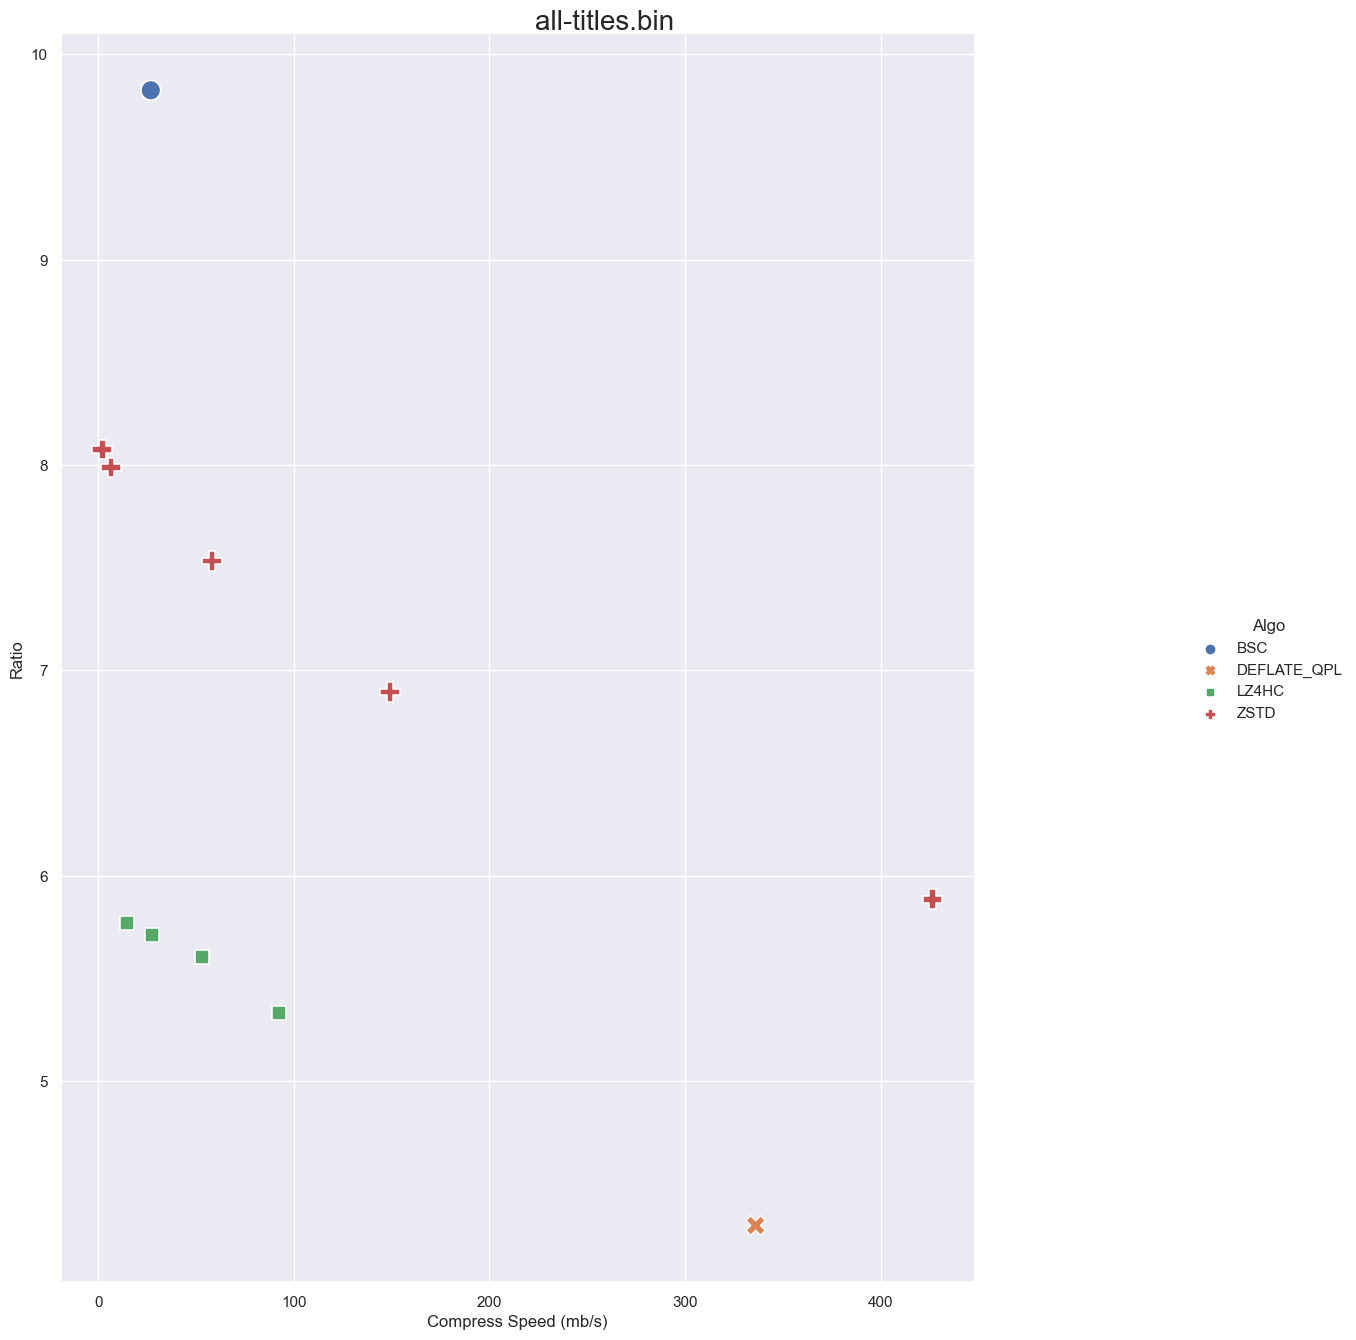

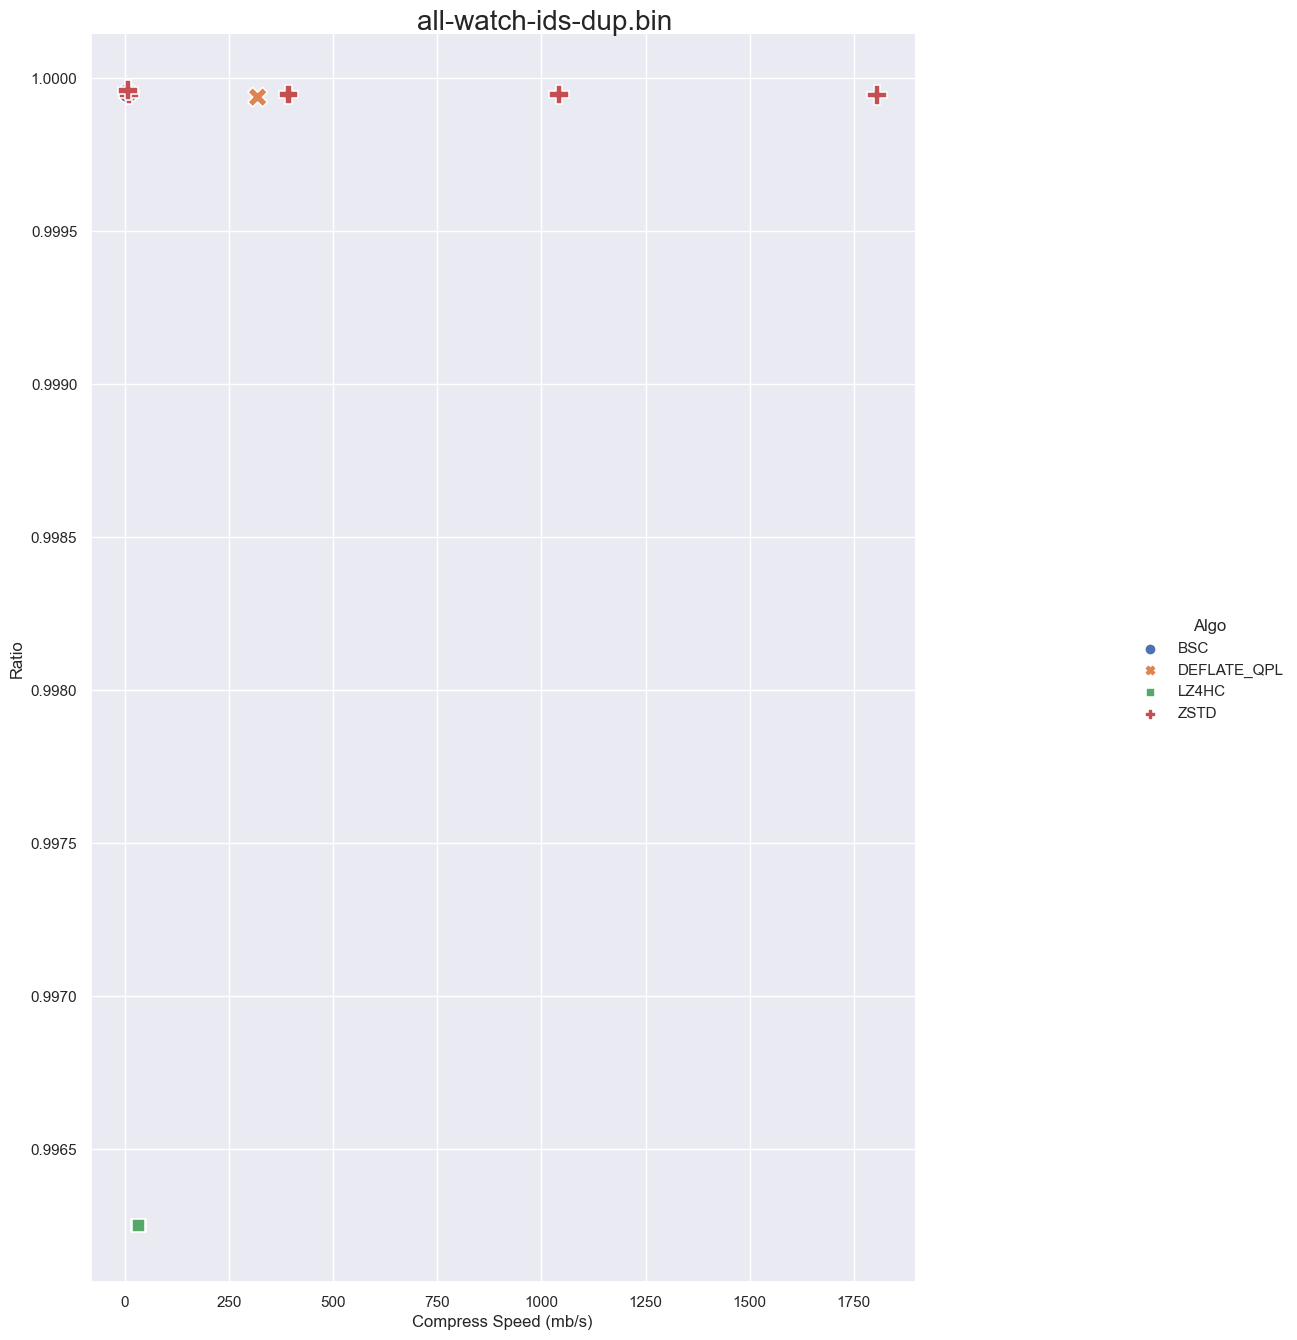

In [40]:
import seaborn as sns
from IPython.display import display
%matplotlib inline

sns.set_theme()
for file in bench_results['File'].unique():
    res = bench_results[bench_results['File'] == file]
    g = sns.relplot(
        data=res,
        x="Compress Speed (mb/s)", y="Ratio",
        hue="Algo", style="Algo", s=200
    )
    g.fig.suptitle(file, fontsize=20)
    g.fig.set_size_inches(15,15)
    g.savefig(f'speed-ratio-{file}.png', dpi=300)
    display(g)

Перед началом анализа хотелось бы подчеркнуть, что LZ4-подобные алгоритмы оптимизированы под быстрое разжатие данных. В плане скорости разжатия они абсолютно вне конкуренции по сравнению с BSC. По этому показателю они превосходят BSC в сотни раз (10 mb/s вместо 1000 mb/s), поэтому сравнение BSC с ними по этому параметру не имеет смысла. В BSC используются продвинутые техники сжатия данных вроде BWT и MTF, которые крайне негативно влияют на скорость разжатия. 

В классических OLTP базах данных нагрузка на чтение выше, чем на запись, поэтому LZ4-подобные алгоритмы подходят лучше. Для чтения блока данных достаточно разжать сжатые данные, а это работает особенно быстро.

В OLAP баз данных нагрузка на запись превышает нагрузку на чтение, поэтому скорость сжатия имеет больший вклад в производительность системы. ClickHouse как раз относится к разряду OLAP, поэтому BSC с его медленным относительно LZ4 сжатием, составляет конкуренцию другим подходам. 

В данном исследовании мы будем сравнивать скорость сжатия и коэффициент сжатия для BSC и в основном LZ4HC(9), то есть LZ4 с уровнем сжатия 9. Выбран именно LZ4HC(9), потому что он представляет из себя "ванильный" LZ4 с рекомендованными уровнем сжатия. Это хорошая базовая версия сжатия, относительно которой удобно рассматривать BSC.

В squash benchmark для датасета "Sample database in MySQL format from Open Source Database Benchmark" BSC работает в 4 медленнее на сжатие и в 100 раз на разжатие, чем LZ4HC(9), но при этом дает в 2 раза больший коэффициент сжатия. 

Для BSC коэффициент сжатия 4.4, скорость сжатия 7 mb/s, разжатия 11 mb/s. 

Для LZ4HC(9) коэффициент сжатия 2.5, скорость сжатия 30 mb/s, разжатия 870 mb/s. 

Давайте сравним это с полученными нами результатами по отдельности на данных разных типов. В selsia MySQL датасете, на котором проводится бенчмарк squash данные разной природы смешаны вместе, что не дает понимания того, какие данные BSC сжимает хорошо, а какие – плохо. 

In [41]:
bench_results[bench_results['File'] == 'all-titles.bin']

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
40,all-titles.bin,BSC,26.805573,49.744572,9.824522,BSC
0,all-titles.bin,DEFLATE_QPL,336.152716,646.196484,4.295883,DEFLATE_QPL
4,all-titles.bin,LZ4HC(12),14.431535,2147.039930,5.770906,LZ4HC
1,all-titles.bin,LZ4HC(4),92.313783,2079.944932,5.328992,LZ4HC
2,all-titles.bin,LZ4HC(6),53.161532,2218.607928,5.602804,LZ4HC
3,all-titles.bin,LZ4HC(9),27.526153,2465.119920,5.709514,LZ4HC
5,all-titles.bin,ZSTD(1),426.655371,1386.629955,5.884694,ZSTD
7,all-titles.bin,ZSTD(10),58.180278,1547.865996,7.532003,ZSTD
8,all-titles.bin,ZSTD(16),6.396140,1479.071952,7.986813,ZSTD
9,all-titles.bin,ZSTD(22),1.994254,1584.719949,8.075043,ZSTD


По моим результатам для данных с названиями посещенных сайтов titles.bin BSC сторого лучше LZ4HC(9), потому что при той же скорости сжатия (26 mb/s) повышает коэффициент сжатия в 2 раза (10 вместо 5). BSC работает даже быстрее, чем LZ4HC(12) и LC4HC(16), но при этом коэффициент сжатия больше (10 вместо 8). 

На titles.bin коэффициент сжатия в 4 раза больше, чем в бенчмарке squash (8 вместо 2). Эти данные хорошо сжались и BSC не смог сильно улучшить этот показатель. 

Делаем вывод, что при если данные по своей природе имеют повторения (в данном случае люди многократно заходят на сайт), BSC сжимает лучше при той же скорости сжатия по сравнению LZ4-подобными алгоритмами.

In [42]:
bench_results[bench_results['File'] == 'all-watch-ids-dup.bin']

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
41,all-watch-ids-dup.bin,BSC,7.506562,2709.118233,0.999949,BSC
10,all-watch-ids-dup.bin,DEFLATE_QPL,318.719792,1505.065685,0.999936,DEFLATE_QPL
14,all-watch-ids-dup.bin,LZ4HC(12),31.193071,3010.131370,0.996252,LZ4HC
11,all-watch-ids-dup.bin,LZ4HC(4),33.404664,3010.131370,0.996252,LZ4HC
12,all-watch-ids-dup.bin,LZ4HC(6),33.425271,3386.397791,0.996252,LZ4HC
13,all-watch-ids-dup.bin,LZ4HC(9),32.718819,3187.197921,0.996252,LZ4HC
15,all-watch-ids-dup.bin,ZSTD(1),1806.078822,3010.131370,0.999944,ZSTD
17,all-watch-ids-dup.bin,ZSTD(10),392.625831,3187.197921,0.999945,ZSTD
18,all-watch-ids-dup.bin,ZSTD(16),9.785509,3386.397791,0.999945,ZSTD
19,all-watch-ids-dup.bin,ZSTD(22),7.448772,3010.131370,0.999959,ZSTD


Для уникальных id watch-ids.bin коэффициент сжатия 1 для всех алгоритмов, BSC имеет такую же производительность как LZ4. 

Если данные по своей природе не жмутся (уникальные ID), то использование BSC не имеет смысла. LZ4-подобные алгоритмы будут сжимать в разы быстрее при том же коэффициенте. 

In [43]:
bench_results[bench_results['File'] == 'all-event-times-dup.bin']

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
42,all-event-times-dup.bin,BSC,10.599088,12.754834,1.830122,BSC
20,all-event-times-dup.bin,DEFLATE_QPL,273.649173,307.855320,1.388645,DEFLATE_QPL
24,all-event-times-dup.bin,LZ4HC(12),28.820498,1425.856219,1.128725,LZ4HC
21,all-event-times-dup.bin,LZ4HC(4),35.835011,1425.856219,1.128642,LZ4HC
22,all-event-times-dup.bin,LZ4HC(6),34.956475,1290.060388,1.128670,LZ4HC
23,all-event-times-dup.bin,LZ4HC(9),35.506249,1425.856219,1.128671,LZ4HC
25,all-event-times-dup.bin,ZSTD(1),416.788741,820.947520,1.396829,ZSTD
27,all-event-times-dup.bin,ZSTD(10),43.485182,645.030194,1.539893,ZSTD
28,all-event-times-dup.bin,ZSTD(16),7.569508,564.401420,1.561236,ZSTD
29,all-event-times-dup.bin,ZSTD(22),4.486795,297.706243,2.121143,ZSTD


Время BCS сжимает в 2 раза лучше LZ4HC(9) (1.8 вместо 1.1) с потерей в производительности сжатия в 3 раза (10 mb/s вместо 30 mb/s).

Время в точности почти не повторяется, но на поиск повторения BSC тратит много времени. 

In [44]:
bench_results[bench_results['File'] == 'all-referer-regions-dup.bin']

,File,Codec,Compress Speed (mb/s),Decompress Speed (mb/s),Ratio,Algo
43,all-referer-regions-dup.bin,BSC,58.861181,115.019553,42.240314,BSC
30,all-referer-regions-dup.bin,DEFLATE_QPL,409.887862,1186.517495,19.772143,DEFLATE_QPL
34,all-referer-regions-dup.bin,LZ4HC(12),2.716779,2817.979050,23.561905,LZ4HC
31,all-referer-regions-dup.bin,LZ4HC(4),144.511746,2504.870266,16.762799,LZ4HC
32,all-referer-regions-dup.bin,LZ4HC(6),69.152860,2504.870266,18.997617,LZ4HC
33,all-referer-regions-dup.bin,LZ4HC(9),17.737083,3757.305400,21.383435,LZ4HC
35,all-referer-regions-dup.bin,ZSTD(1),805.136871,1186.517495,20.050767,ZSTD
37,all-referer-regions-dup.bin,ZSTD(10),102.471965,1610.273743,28.510950,ZSTD
38,all-referer-regions-dup.bin,ZSTD(16),14.028520,2504.870266,31.121084,ZSTD
39,all-referer-regions-dup.bin,ZSTD(22),3.138935,2049.439309,34.593652,ZSTD


На списках с ID regions.bin BSC показывает хорошие результаты. При сопоставимой c LZ4HC(6) скорости сжатия (60 mb/s) коэффициент сжатия в два раза больше (40 вместо 20). 

Это еще раз подтверждает гипотезу о том, что на данных, природа которых способствует дублированию (в данном случае ID регионов в списках повторяются), BSC смотрится крайне хорошо, потому что позволяет при той же скорости сжатия повысить степень стажия в пару раз. 

**Критика squash benchmark**
По squash benchmark для датасета selsia MySQL датасета можно сделать вывод, что BSC работает в 4 медленнее на сжатие и в 100 раз на разжатие, чем LZ4HC(9), но при этом дает в 2 раза больший коэффициент сжатия. 

Однако по результатам исследования можно сделать вывод, что хотя результаты squash benchmark и имеют связь с реальностью, они не вполне четко отражают реальное положение дел. В squash benchmark производится измерение на датасете, состоящем из таблицы, где вперемешку лежат разные виды данных. Так как разные типы данных жмутся с разной скоростью и степенью сжатия, это дает спутанную картину ситуации.  
**Полученные результаты**
Если данные по своей природе имеют потенциал быть сжатыми (например, имеют дубликаты), BSC сжимает лучше при той же скорости сжатия по сравнению LZ4-подобными алгоритмами. Иначе (например, для уникальных ID, timestamp-ов) применение BSC лишено смысла, потому что LZ4 справляется не слабее, показывая на порядок лучшую скорость сжатия. 